<a href="https://colab.research.google.com/github/zainabbio/Youtube-Tutorials/blob/main/Plotting_in_R_with_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plotting with ggplot2**

In R, besides the basic plotting system, there's another popular one called **ggplot2**, which uses a different approach known as the **"grammar of graphics."** This system builds a plot by combining different components. For example, in a scatter plot, the points are geometric shapes, and the plot also includes data scales, coordinates, and transformations. In a histogram, the data is grouped into bins before being displayed as bars.

To create a plot with **ggplot2**, you need:
1. **Data**: The first component is your data and how it's transformed (e.g., mapping to points for scatter plots or bins for histograms).
2. **Scales and Coordinates**: These define the axes and legends.
3. **Annotations**: These include things like titles and background.

The main function in **ggplot2** is **ggplot()**, which takes a data frame as its first argument. The **aes()** function inside it maps the data to visual elements like x/y coordinates or colors. The **geom_point()** function is used to create scatter plot points. You can add more layers or modify the plot using the **+** sign.

This approach allows you to build and customize plots step by step.

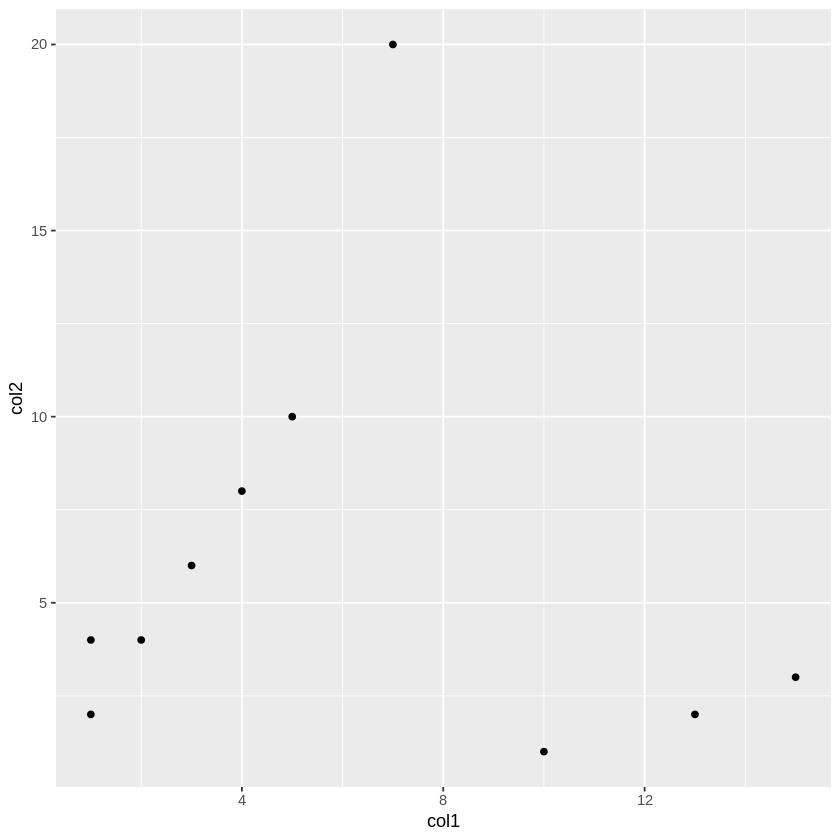

In [8]:
# Load ggplot2 library
library(ggplot2)

# Create a simple dataset
x <- c(1, 2, 3, 4, 5, 7, 10, 13, 15, 1)  # X values
y <- c(2, 4, 6, 8, 10, 20, 1, 2, 3, 4)  # Y values

# Create a data frame from the x and y vectors
myData <- data.frame(col1 = x, col2 = y)

# Create a ggplot scatter plot using col1 and col2
ggplot(myData, aes(x = col1, y = col2)) +
  geom_point()  # Map x and y as points

To recreate the histogram, we'll use the ggplot() function with one column of data for the x-axis. Then, we'll add the histogram layer with geom_histogram(). To customize the plot, we’ll use labs() to add axis labels and a title. Here's how:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


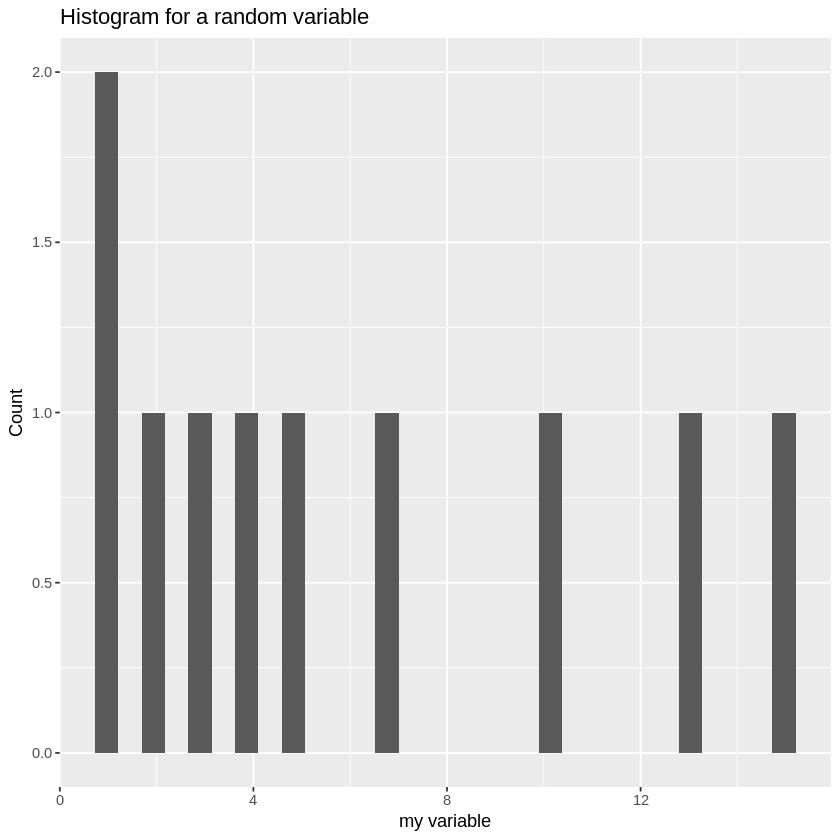

In [9]:
ggplot(myData, aes(x=col1)) +
  geom_histogram() + # map x and y as points
  labs(title="Histogram for a random variable", x="my variable", y="Count")

To create a boxplot with ggplot2, we need to organize our data into a data frame with one column for the groups and another for the numeric values. Here's how you can do it:

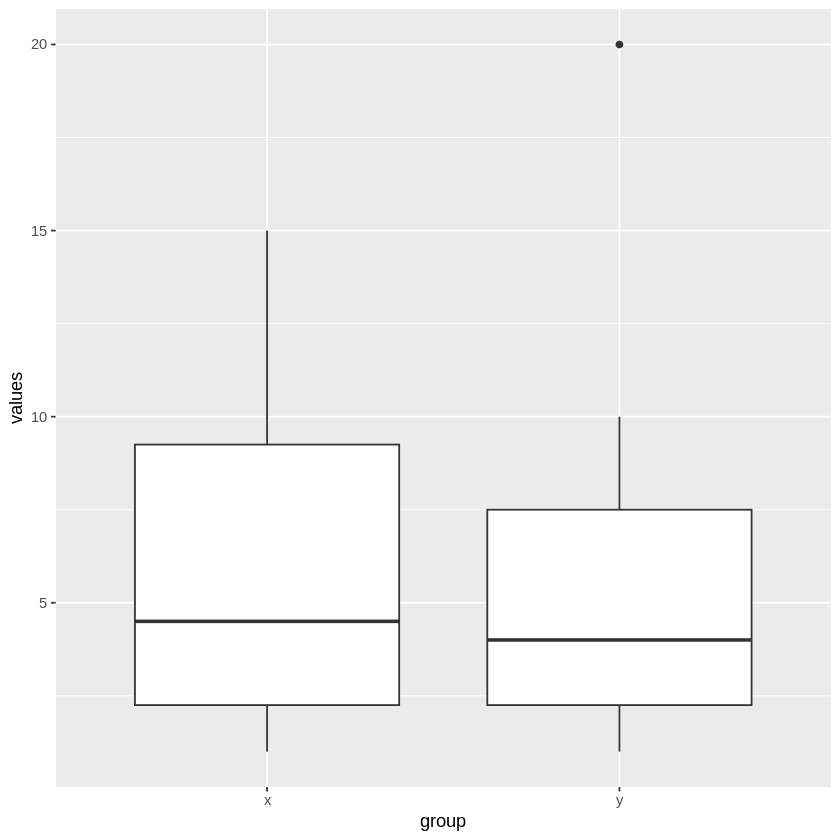

In [10]:
# data frame with group column showing which
# groups the vector x and y belong
myData2=rbind(data.frame(values=x,group="x"),
              data.frame(values=y,group="y"))

# x-axis will be group and y-axis will be values
ggplot(myData2, aes(x=group,y=values)) +
         geom_boxplot()

# **Combining multiple plots**

To combine multiple plots, we can use faceting in ggplot2, which splits the plot into subsets based on a factor (like groups). This is done with the facet_grid() function.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


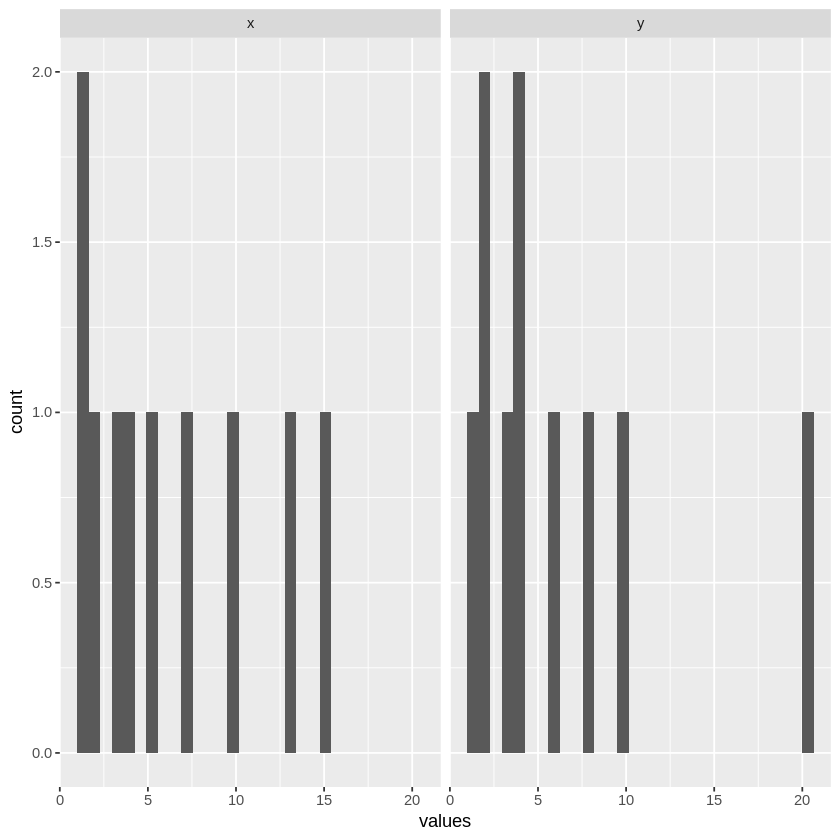

In [11]:
ggplot(myData2, aes(x=values)) +
         geom_histogram() +facet_grid(.~group)

To combine different types of plots, like a histogram and a scatter plot, you can use the cowplot package in ggplot2. This package allows you to align plots in a grid, making it easy to create compound plots. Here's how you can combine a histogram and scatter plot:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


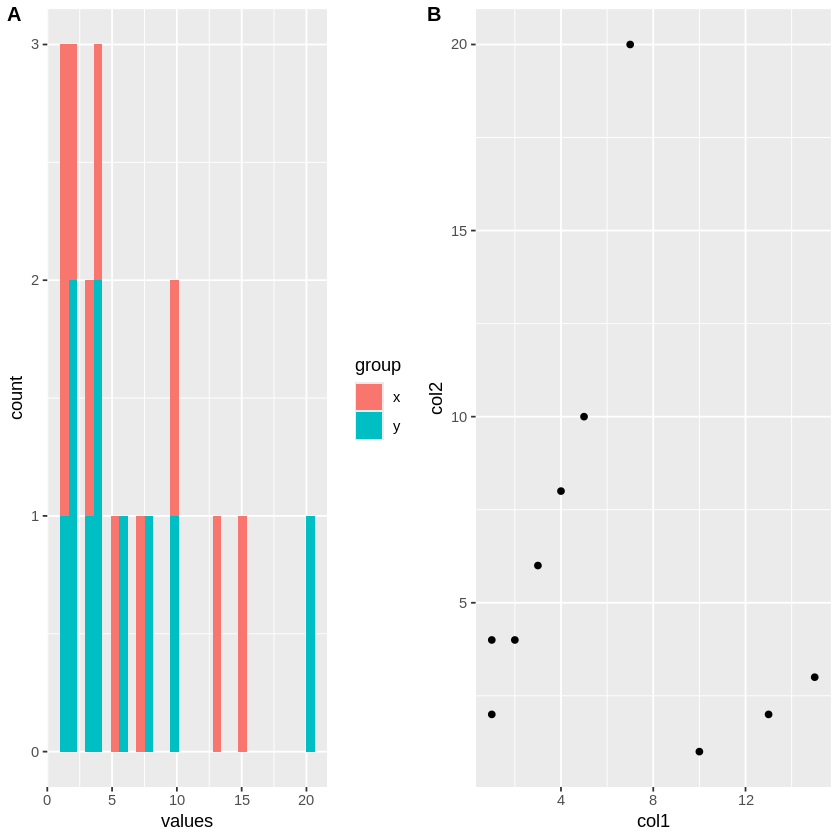

In [14]:
install.packages("cowplot")
library(cowplot)
# histogram
p1 <- ggplot(myData2, aes(x=values,fill=group)) +
        geom_histogram()
# scatterplot
p2 <- ggplot(myData, aes(x=col1, y=col2)) +
  geom_point()

# plot two plots in a grid and label them as A and B
plot_grid(p1, p2, labels = c('A', 'B'), label_size = 12)

# **ggplot2 and tidyverse**

ggplot2 is part of the larger tidyverse ecosystem. To make more advanced plots, you may need to use additional packages like dplyr for data manipulation, tidyr for data reshaping, and stringr for working with strings. These packages help format data and enhance the functionality of ggplot2 for more complex tasks, beyond what base R offers.